In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.patches as mpatches
mpl.rcParams['figure.dpi'] = 300

#### Figure 1 - Anisotropy
#### Input graph data

In [3]:
### PIP2 aniso part       [LUVs]   EDTA   SD     10CA   SD    100CA  SD
P7_Partition = np.array([[0.000,   0.312, 0.001, 0.312, 0.001, 0.312,  0.001],
                         [10.000,  0.260, 0.008, 0.292, 0.004, 0.300,  0.001],
                         [20.000,  0.260, 0.002, 0.291, 0.010, np.nan, np.nan],
                         [35.000,  0.252, 0.002, 0.293, 0.007, 0.288,  0.012],
                         [50.000,  0.248, 0.001, 0.286, 0.009, 0.282,  0.019],
                         [75.000,  0.248, 0.004, 0.279, 0.009, 0.292,  0.001],
                         [100.000, 0.246, 0.010, 0.277, 0.006, 0.290,  0.003]])

### Quenching graph      %bleach    Anis     SD         Pred 2mer   Pred 3mer
P7_bleaching = np.array([[0.000,    0.243717, 0.005942, 0.236727, 0.236675807],
                         [20.69071, 0.245223, 0.010233, 0.250142, 0.249931407],
                         [30.63618, 0.251016, 0.012254, 0.256591, 0.256431543],
                         [42.34749, 0.259418, 0.013628, 0.264184, 0.264192769],
                         [57.35935, 0.282189, 0.012384, 0.273918, 0.274310537]])

P7_bleaching_sol = np.array([[0.000,   0.324997693321042 ],
                         [34.161165160625, 0.316070011018744],
                         [42.94214588, 0.310143629800423],
                         [48.2694784732132, 0.312825292944354],
                         [69.6758259369866, 0.313397289496855]])
#### Anisotropia recovery with EDTA
Anis_rec= np.array([[0,0.27581,0.020],
                    [1,0.24376,0.008779],
                    [5,0.23507,0.0117]])


#### Graph It!

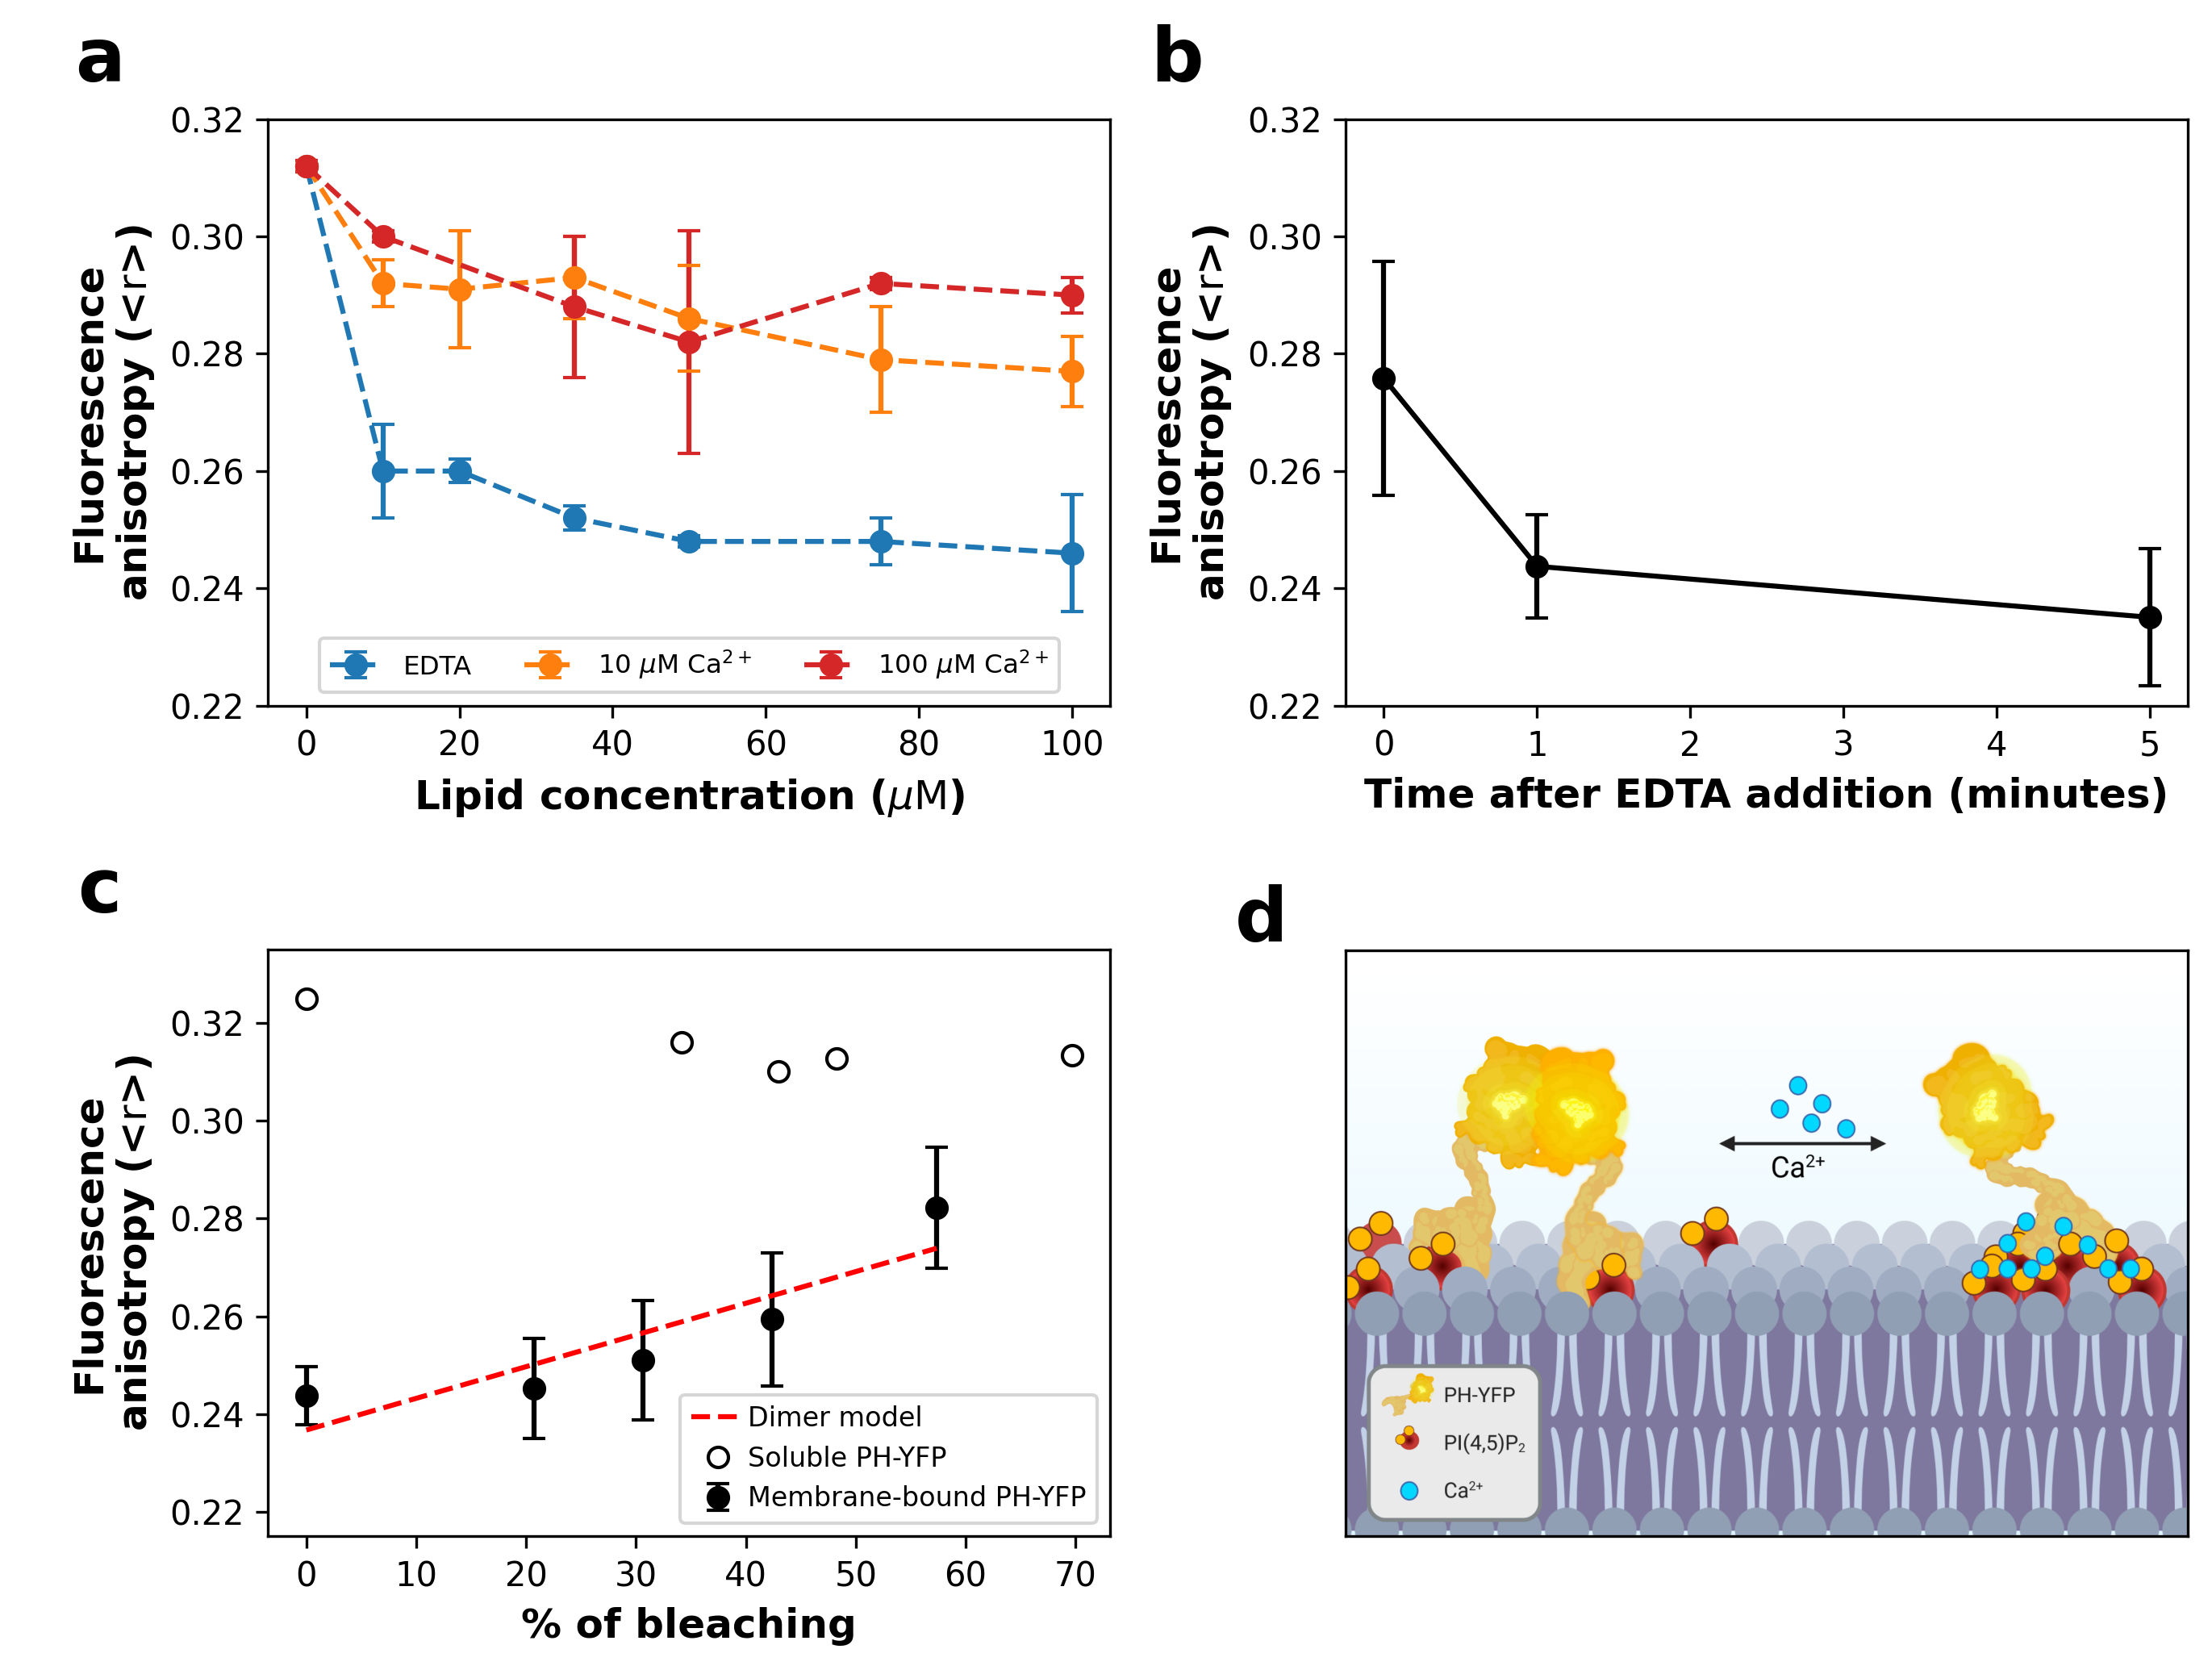

In [4]:
####Plot the calculated RDFs.
fig = plt.figure(figsize=(4.4*2.1,3.5*2), tight_layout=True)

#fig.suptitle('PIP2 phosphate protrusion from membrane', fontsize=16, y=1.05)
###Define the bins to be used    


plt.subplot(2,2,1)
    
plt.ylabel('Fluorescence\nanisotropy (<$\mathrm{r}$>)', fontweight='bold', fontsize=12)
plt.xlabel(r"Lipid concentration ($\mu\mathrm{M}$)", fontweight='bold', fontsize=12)
#plt.grid()
plt.ylim(0.22, 0.32)
#plt.title('di16:0', fontweight='bold')

plt.errorbar( P7_Partition[:,0], P7_Partition[:,1], yerr=P7_Partition[:,2], color ='tab:blue', marker='o', linestyle='--', capsize=3.3)
plt.errorbar( P7_Partition[:,0], P7_Partition[:,3], yerr=P7_Partition[:,4], color ='tab:orange', marker='o', linestyle='--', capsize=3.3)
P7_nonan = np.delete(P7_Partition, 2, 0)
plt.errorbar( P7_nonan[:,0], P7_nonan[:,5], yerr=P7_nonan[:,6], color ='tab:red', marker='o', linestyle='--', capsize=3.3)

plt.legend(['EDTA', '10 $\mu\mathrm{M}$ Ca$^{2+}$', '100 $\mu\mathrm{M}$ Ca$^{2+}$'], loc='lower center', ncol=3, fontsize=7.8)
plt.gca().text(-0.2, 1.1,'a', fontweight='bold', fontsize=22,
     horizontalalignment='center',
     verticalalignment='center',
     transform = plt.gca().transAxes)

plt.subplot(2,2,3)
    
#plt.grid()
#plt.xlim(0,12.5)
#plt.title('di18:1', fontweight='bold')

plt.errorbar( P7_bleaching_sol[:,0], P7_bleaching_sol[:,1], color ='black', marker='o', linestyle='none', capsize=3.3, fillstyle='none')
plt.errorbar( P7_bleaching[:,0], P7_bleaching[:,1], yerr=P7_bleaching[:,2], color ='black', marker='o', linestyle='none', capsize=3.3)
plt.plot(P7_bleaching[:,0], P7_bleaching[:,-2], color ='red', linestyle='--')
# plt.plot(P7_bleaching[:,0], P7_bleaching[:,-1], color ='orange', linestyle='--')

# plt.legend(['Dimer model','PH-YFP in solution', 'Membrane bound PH-YFP'], loc='upper center', ncol=2, fontsize=9.5)
plt.legend(['Dimer model','Soluble PH-YFP', 'Membrane-bound PH-YFP'], loc='lower right', ncol=1, fontsize=8, handletextpad=0.1)

plt.ylabel('\nFluorescence\nanisotropy (<$\mathrm{r}$>)', fontweight='bold', fontsize=12)
plt.xlabel('% of bleaching', fontweight='bold', fontsize=12)

plt.ylim(0.215,0.335)
plt.gca().text(-0.2, 1.1,'c', fontweight='bold', fontsize=22,
     horizontalalignment='center',
     verticalalignment='center',
     transform = plt.gca().transAxes)


plt.subplot(2,2,2)

plt.errorbar( Anis_rec[:,0], Anis_rec[:,1], yerr=Anis_rec[:,2], color ='black', marker='o', capsize=3.3)

plt.ylabel('Fluorescence\nanisotropy (<$\mathrm{r}$>)', fontweight='bold', fontsize=12)
plt.xlabel('Time after EDTA addition (minutes)', fontweight='bold', fontsize=12)
plt.ylim(0.220,0.32)
plt.gca().text(-0.2, 1.1,'b', fontweight='bold', fontsize=22,
     horizontalalignment='center',
     verticalalignment='center',
     transform = plt.gca().transAxes)

plt.subplot(2,2,4)
img = mpimg.imread('./phyfpagg_figures/PH-YFP1(1).png')
imgplot = plt.imshow(img[:, :, :])  ###YY, XX
# plt.axis('off')
plt.gca().text(-0.1, 1.05,'d', fontweight='bold', fontsize=22,
     horizontalalignment='center',
     verticalalignment='center',
     transform = plt.gca().transAxes)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) 

plt.savefig('./phyfpagg_figures/PAINEL1.svg',transparent=True)
plt.savefig('./phyfpagg_figures/PAINEL1.pdf',transparent=True)
plt.savefig('./phyfpagg_figures/PAINEL1.png',transparent=True)

#### Figure 2 - FCS
#### Input graph data

In [5]:
### FCS Curves (CA & NoCA)
P6_FCS = np.genfromtxt('FCS.csv', delimiter=',')

### Diffusion Histograms
P6_DIF= np.array([[0.000,   6.122, 0.328],
                  [20.000,  4.003, 0.424],
                  [50.000,  5.371, 0.398],
                  [100.000, 4.276, 0.650],
                 ])

#### FCS D of only protein w/ and w/o CA
###########          ca       Mean   Stdev   SEM
FCS_D_SOL= np.array([[0.00,   70.09, 10.55, 5.716],
                     [100.00, 68.87, 3.900, 1.744]])


#### Graph It!

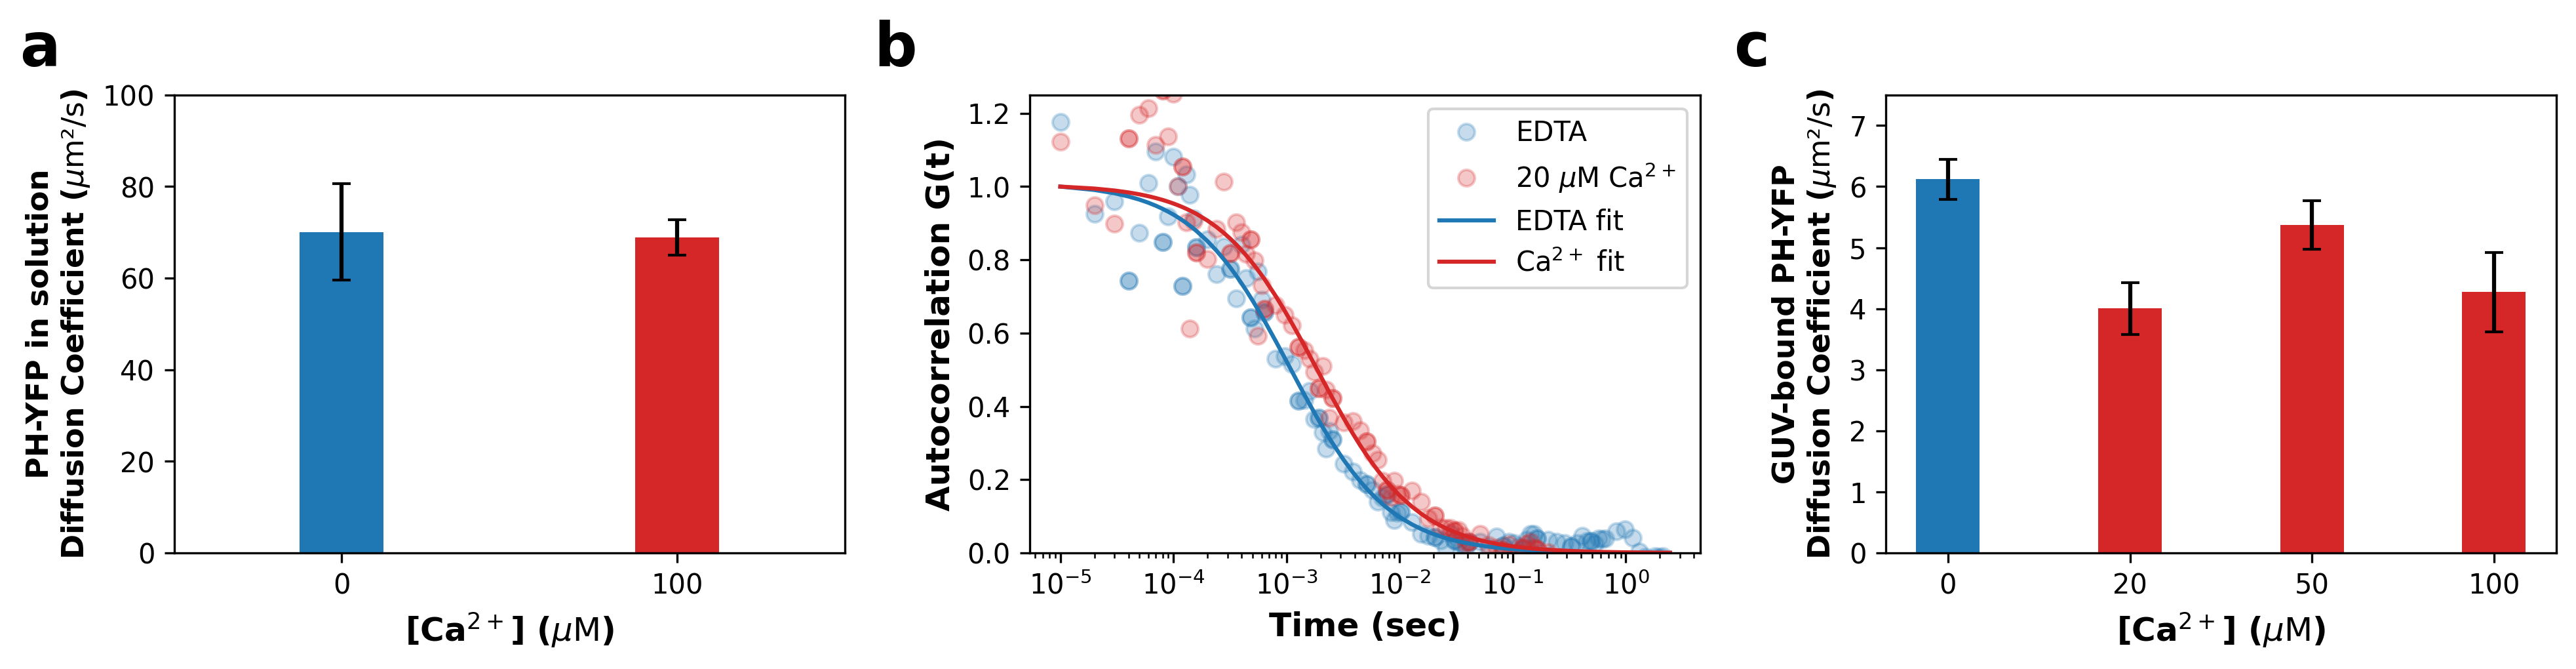

In [6]:
####Plot the calculated RDFs.
def autolabel(rects,i):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[i].annotate('{0:.2f}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height+0.04),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
def autolabel_1(rects,i):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[i].annotate('{0:.2f}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height+0.5),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


fig, axs = plt.subplots(1,3, figsize=(5.5*2.4,3.5*1), tight_layout=True)

####################
#### FCS Curves ####
####################
ax = axs[1]

ax.plot(P6_FCS[:,0],P6_FCS[:,1], label='EDTA', marker ='o', linestyle='none', color='tab:blue',alpha=0.25)
ax.plot(P6_FCS[:,0],P6_FCS[:,3], label='20 $\mu\mathrm{M}$ Ca$^{2+}$', marker ='o', linestyle='none', color='tab:red',alpha=0.25)

ax.plot(P6_FCS[:,0],P6_FCS[:,2], label='EDTA fit',  color='tab:blue')
ax.plot(P6_FCS[:,0],P6_FCS[:,4], label='Ca$^{2+}$ fit', color='tab:red')

ax.set_ylabel('Autocorrelation G(t)', fontweight='bold', fontsize=12)
ax.set_xlabel("Time (sec)", fontweight='bold', fontsize=12)

ax.set_xscale('log')
ax.set_ylim((0,1.25))
ax.legend()
ax.text(-0.2, 1.1,'b', fontweight='bold', fontsize=22,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
###################

####################
#### Difusion ######
####################
ax = axs[2]


labels = list(P6_DIF[:,0].astype(int))
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x, P6_DIF[:,1], width, label='+Ca2+', yerr=P6_DIF[:,2], capsize=3.3, color=['tab:blue','tab:red','tab:red','tab:red'])

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax[0,1].set_title('di18:1', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,7.5)
ax.set_ylabel('GUV-bound PH-YFP\nDiffusion Coefficient ($\mu\mathrm{m}²/\mathrm{s}$)', fontweight='bold', fontsize=11)
ax.set_xlabel('[Ca$^{2+}$] ($\mu\mathrm{M}$)', fontweight='bold', fontsize=12)

# autolabel(rects1,1)
ax.text(-0.2, 1.1,'c', fontweight='bold', fontsize=22,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
###################

####################
#### Difusion ######
####################
ax = axs[0]

labels = list(FCS_D_SOL[:,0].astype(int))
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

rects1 = ax.bar(x, FCS_D_SOL[:,1], width, label='+Ca2+', yerr=FCS_D_SOL[:,2], capsize=3.3, color=['tab:blue','tab:red'])

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,100)
ax.set_xlim(-0.5,1.5)
ax.set_ylabel('PH-YFP in solution\nDiffusion Coefficient ($\mu\mathrm{m}²/\mathrm{s}$)', fontweight='bold', fontsize=11)
ax.set_xlabel('[Ca$^{2+}$] ($\mu\mathrm{M}$)', fontweight='bold', fontsize=12)

ax.text(-0.2, 1.1,'a', fontweight='bold', fontsize=22,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

plt.savefig('./phyfpagg_figures/PAINEL2.svg',transparent=True)
plt.savefig('./phyfpagg_figures/PAINEL2.pdf',transparent=True)
plt.savefig('./phyfpagg_figures/PAINEL2.png',transparent=True)

#### Figure 3 - PCH
#### Input graph data

In [7]:
### PCH hist           counts  edta       ca          edta fit    ca fit
P6_PCH_Hist= np.array([[0.00, 0.81,       0.85,       0.81,       0.85],
                       [1.00, 0.17,       0.14,       0.17,       0.14],
                       [2.00, 0.02,       0.01,       0.02,       0.01],
                       [3.00, 0.00166,    0.000901,   0.00166,    0.000913],
                       [4.00, 0.000117,   0.0000551,  0.000116,   0.0000533],
                       [5.00, 0.00000702, 0.00000200, 0.00000708, 0.00000273]])

### FWB hist           ca       F1     F2     SEM
P6_FWB_hist= np.array([[0.00,   0.713, 0.287, 0.053],
                       [20.00,  0.993, 0.007, 0.002],
                       [50.00,  0.825, 0.175, 0.057],
                       [100.00, 0.865, 0.135, 0.030],
                      ])
#### PCH brightness of only protein w/ and w/o CA  && PCH brightness in GUVs
PCH_SOL= np.array([[0.00,   0.06845, 0.002156, 0.001078],
                   [100.00, 0.07063, 0.001403, 0.0007016]])

PCH_GUV= np.array([[0,0.06525,0.00326859482365314,0.172166666666667,0.0142615361774745],
                   [20,0.0706,0.00337045990927054,0.4072,0.0828635826725669],
                   [50,0.0746666666666667,0.00983756970891581,0.302666666666667,0.0664763951422692],
                   [100,0.088,0.0297452143676555,0.408333333333333,0.110734417012558]])

#### Graph It!

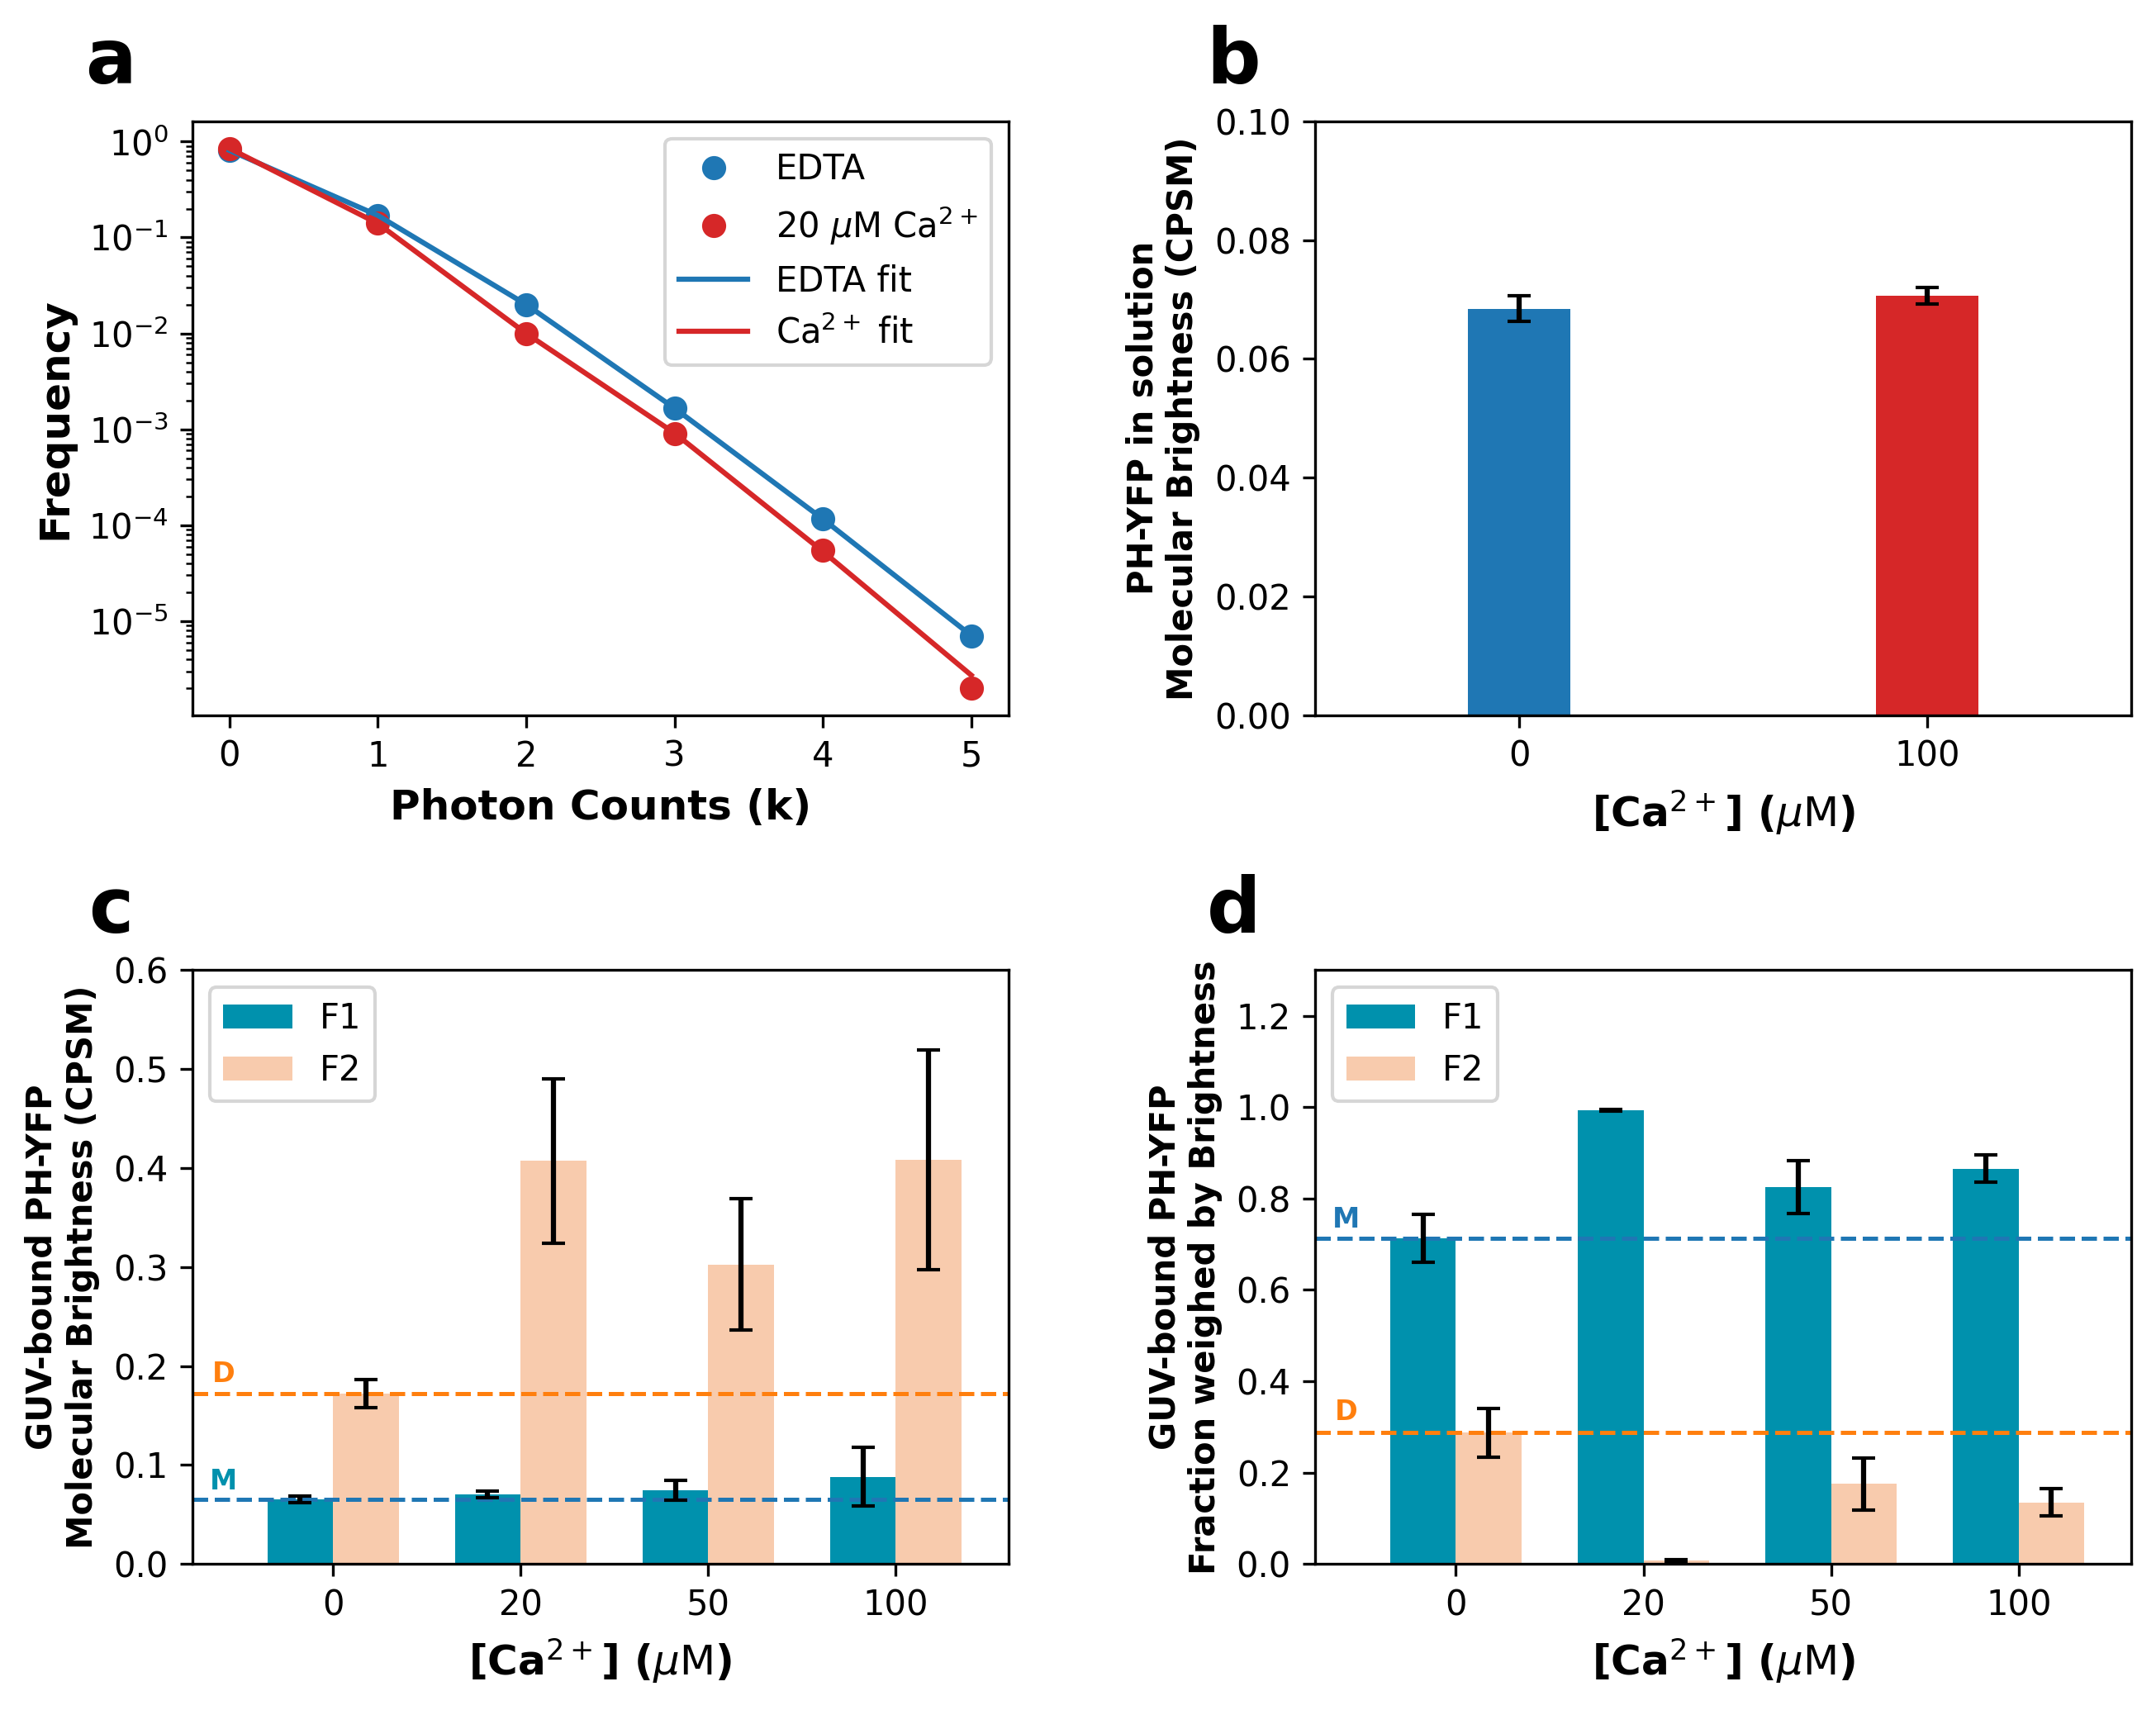

In [8]:
####Plot the calculated RDFs.
def autolabel(rects,i):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[i].annotate('{0:.2f}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height+0.04),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
def autolabel_1(rects,i):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[i].annotate('{0:.2f}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height+0.5),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


fig, axs = plt.subplots(2,2, figsize=(4.4*2,3.5*2), tight_layout=True)


####################
#### PCH Hist ######
####################
ax = axs[0,0]
ax.plot(P6_PCH_Hist[:,0],P6_PCH_Hist[:,1], marker='o',linestyle= 'none',label='EDTA', color='tab:blue')
ax.plot(P6_PCH_Hist[:,0],P6_PCH_Hist[:,2], marker='o',linestyle= 'none', label='20 $\mu\mathrm{M}$ Ca$^{2+}$', color='tab:red')
ax.plot(P6_PCH_Hist[:,0],P6_PCH_Hist[:,3], label='EDTA fit', color='tab:blue')
ax.plot(P6_PCH_Hist[:,0],P6_PCH_Hist[:,4], label='Ca$^{2+}$ fit', color='tab:red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency', fontweight='bold', fontsize=12)
ax.set_xlabel('Photon Counts (k)', fontweight='bold', fontsize=12)
ax.set_yscale('log')
ax.legend()

ax.text(-0.1, 1.1,'a', fontweight='bold', fontsize=22,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
###################

####################
#### FWB      ######
####################
ax = axs[1,1]
labels = list(P6_FWB_hist[:,0].astype(int))
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, P6_FWB_hist[:,1], width, color='#0091ad', yerr=P6_FWB_hist[:,3], capsize=3.3,label='F1')
rects2 = ax.bar(x + width/2, P6_FWB_hist[:,2], width, color='#f8cbad', yerr=P6_FWB_hist[:,3], capsize=3.3,label='F2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('\n\nGUV-bound PH-YFP\nFraction weighed by Brightness', fontweight='bold', fontsize=10)
ax.set_xlabel('[Ca$^{2+}$] ($\mu\mathrm{M}$)', fontweight='bold', fontsize=12)
ax.set_ylim((0,1.3))
ax.set_xlim((-0.75,3.60))
ax.legend(loc='upper left')

ax.axhline(P6_FWB_hist[:,1][0], linestyle='--', color='tab:blue', zorder=1, alpha=1, linewidth=1.2)
ax.text(0.038, 0.580,'M', fontweight='bold', fontsize=8,
     horizontalalignment='center',
     verticalalignment='center',
     color='tab:blue',
     transform = ax.transAxes)

ax.axhline(P6_FWB_hist[:,2][0], linestyle='--', color='tab:orange', zorder=1, alpha=1, linewidth=1.2)
ax.text(0.038, 0.255,'D', fontweight='bold', fontsize=8,
     horizontalalignment='center',
     verticalalignment='center',
     color='tab:orange',
     transform = ax.transAxes)


# autolabel(rects1,(1,1))
# autolabel(rects2,(1,1))
ax.text(-0.1, 1.1,'d', fontweight='bold', fontsize=22,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
###################

####################
#### Solution B ######
####################
ax = axs[0,1]
labels = list(PCH_SOL[:,0].astype(int))
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

rects1 = ax.bar(x, PCH_SOL[:,1], width, label='+Ca2+', color=['tab:blue','tab:red'], yerr=PCH_SOL[:,2], capsize=3.3)

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax[0,1].set_title('di18:1', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,0.1)
ax.set_xlim(-0.5,1.5)
ax.set_ylabel('\n\nPH-YFP in solution\nMolecular Brightness (CPSM)', fontweight='bold', fontsize=10)
ax.set_xlabel('[Ca$^{2+}$] ($\mu\mathrm{M}$)', fontweight='bold', fontsize=12)
ax.text(-0.1, 1.1,'b', fontweight='bold', fontsize=22,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
####################
#### GUV B    ######
####################
ax = axs[1,0]
labels = list(PCH_GUV[:,0].astype(int))
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


rects1 = ax.bar(x - width/2, PCH_GUV[:,1], width, color='#0091ad', yerr=PCH_GUV[:,2], capsize=3.3,label='F1')
rects2 = ax.bar(x + width/2, PCH_GUV[:,3], width, color='#f8cbad', yerr=PCH_GUV[:,4], capsize=3.3,label='F2')

ax.axhline(PCH_GUV[:,1][0], linestyle='--', color='tab:blue', zorder=1, alpha=1, linewidth=1.2)
ax.text(0.038, 0.138,'M', fontweight='bold', fontsize=8,
     horizontalalignment='center',
     verticalalignment='center',
     color='#0091ad',
     transform = ax.transAxes)

ax.axhline(PCH_GUV[:,3][0], linestyle='--', color='tab:orange', zorder=1, alpha=1, linewidth=1.2)
ax.text(0.038, 0.320,'D', fontweight='bold', fontsize=8,
     horizontalalignment='center',
     verticalalignment='center',
     color='tab:orange',
     transform = ax.transAxes)

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax[1,1].set_title('18:0 20:4', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('GUV-bound PH-YFP\nMolecular Brightness (CPSM)', fontweight='bold', fontsize=10)
ax.set_xlabel('[Ca$^{2+}$] ($\mu\mathrm{M}$)', fontweight='bold', fontsize=12)
ax.set_ylim((0,0.6))
ax.set_xlim((-0.75,3.60))
ax.legend()

ax.text(-0.1, 1.1,'c', fontweight='bold', fontsize=22,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

plt.savefig('./phyfpagg_figures/PAINEL3.svg',transparent=True)
plt.savefig('./phyfpagg_figures/PAINEL3.pdf',transparent=True)
plt.savefig('./phyfpagg_figures/PAINEL3.png',transparent=True)

In [25]:
### FCS Curves (CA & NoCA)
FCS_SI = np.genfromtxt('SIGrafico.csv', delimiter=';')

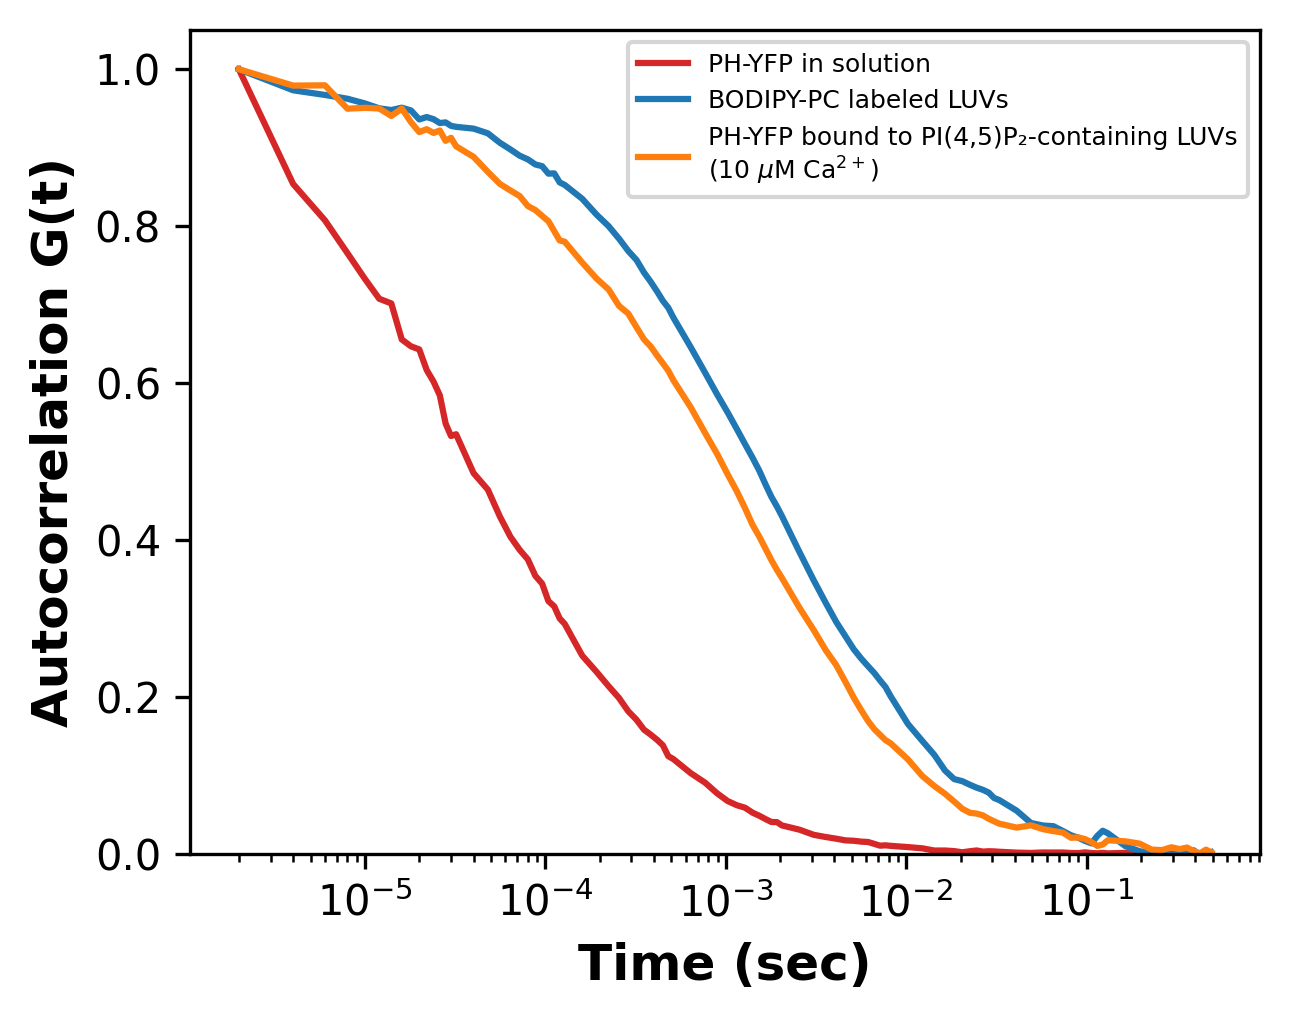

In [42]:
fig, ax = plt.subplots(1,1, figsize=(4.4*1,3.5*1), tight_layout=True)

ax.plot(FCS_SI[:,0],FCS_SI[:,1], label='PH-YFP in solution', color='tab:red')
ax.plot(FCS_SI[:,0],FCS_SI[:,2], label='BODIPY-PC labeled LUVs', color='tab:blue')
ax.plot(FCS_SI[:,0],FCS_SI[:,3], label='PH-YFP bound to PI(4,5)P₂-containing LUVs\n(10 $\mu\mathrm{M}$ Ca$^{2+}$)', color='tab:orange')

#PH-YFP + LUVs 5% PIP2

ax.set_ylabel('Autocorrelation G(t)', fontweight='bold', fontsize=12)
ax.set_xlabel("Time (sec)", fontweight='bold', fontsize=12)

ax.set_xscale('log')
ax.set_ylim((0,1.05))
ax.legend(fontsize=6)

plt.savefig('./phyfpagg_figures/S1.svg',transparent=True)
plt.savefig('./phyfpagg_figures/S1.pdf',transparent=True)
plt.savefig('./phyfpagg_figures/S1.png',transparent=True)